## ***EVALUACIÓN MODELOS***
El dataset utilizado no contiene una gran cantidad de datos ya que se realizar exclusivamente de la zona de Churriana, Málaga y además nuestro modelo de scrapeo web termina bloqueando la extracción de datos y no nos permite obtener todos los datos de la zona disponibles.

Se aplican diferentes modelos para ver cual de ellos presenta el mejor comportamiento a la hora de predecir el precio:
* Regresión Lineal
* Regresión Polinómica
* SVM-Support Vector Machine
* Arbol de Regresión
* Redes Neuronales - Regresión

**Importamos las librerías necesarias:**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [88]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [89]:
data.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,36.666638,-4.464576,395000,7,4,3,1.0,1.0,1.0,1.0,0.0,194,0,0,1
1,36.663719,-4.503897,640000,7,4,2,1.0,1.0,1.0,1.0,0.0,310,0,0,1
2,36.656894,-4.502930,567000,7,5,4,1.0,1.0,0.0,1.0,0.0,410,0,0,1
3,36.671190,-4.516900,375900,8,4,2,1.0,1.0,1.0,1.0,1.0,236,1,0,0
4,36.671190,-4.516900,249900,8,2,2,0.0,1.0,1.0,1.0,1.0,150,1,0,0


**Tabla para evaluación de los modelos**<br>
Creamos una tabla vacía con las siguientes columnas: 'Modelo', 'Detalles', 'R2 train', 'R2 test', 'MAE train' y 'MAE test'.
Aquí iremos agregando los resultados de cada modelo para finalmente de un simple vistazo poder comparar los rendimientos que aportan y quedarnos con uno de ellos.

In [90]:
resultados = pd.DataFrame({
    'Modelo':[],
    'Detalles':[],
    'R2 train':[],
    'R2 test':[],
    'MAE train':[],
    'MAE test':[]
})

Definimos dos funciones que nos ayudarán a evaluar posteriormente el rendimiento de los modelos.

In [91]:
def error_absoluto_medio(y,y_pred):
    v = np.abs(y - y_pred)
    return v.sum()/len(y)
    
def error_gen(y_train,y_pred_train,y_test,y_pred_test):
    MAE_TRAIN = error_absoluto_medio(y_train,y_pred_train)
    MAE_TEST = error_absoluto_medio(y_test,y_pred_test)
    return MAE_TRAIN,MAE_TEST

#### **Regresión lineal**

En primer lugar aplicaremos un modelo de regresión lineal. Aplicaremos este modelo a nuestros diferentes conjuntos de datos. Recordar que los datos ya han sido limpiados y trabajados en la sección anterior por lo que ya están preparados para su uso.
* Primero usaremos el dataset final preparado para los modelos si tratar adicionalmente los datos. (data_model_churriana_malaga.csv)
* Aplicaremos el modelo también a nuestro dataset sin Outliers. (data_model_churriana_malaga_without_outliers.csv)
* Trataremos los datos tanto totales como sin Outliers y preprocesaremos los mismos haciendo un escalado de datos para evaluar el modelo. 


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
#Definimos una función para aplicar regresiones lineales. 
def regresion_lineal(data,test_size=0.2,Prec_var='price'):
    #definimos las variables den entrada y salida.
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    
    #dividimos el conjunto
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
  
    #definimos la instancia
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    
    #metricas de evaluación
    r2_train = lr.score(x_train,y_train)
    r2_test = lr.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    #aplicamos el modelo
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    
    MAE_train = error_absoluto_medio(y_train,y_train_pred)
    
    MAE_test = error_absoluto_medio(y_test,y_test_pred)
    
    return r2_train,r2_test,MAE_train,MAE_test

r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.62433,115166.04626


In [94]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data2 = pd.read_csv(file_path, index_col = 0)

In [95]:
r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data2)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Sin procesar / Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,115166.046260
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,88107.692013


#### **Escalación de los datos**

In [133]:
col_esc

array(['latitude', 'longitude', 'energy_certification', 'room_number',
       'bath_number', 'has_garden', 'has_terrace', 'has_parking',
       'has_swimmingpool', 'has_lift', 'constructed_area',
       'is_new_development', 'is_needs_renovating', 'is_goog_condition'],
      dtype=object)

In [134]:
data3[col_esc]

,latitude,longitude,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,0.104634,0.212265,0.875,0.230769,0.285714,1.0,1.0,1.0,1.0,0.0,0.058776,0.0,0.0,1.0
1,0.099171,0.174626,0.875,0.230769,0.142857,1.0,1.0,1.0,1.0,0.0,0.106122,0.0,0.0,1.0
2,0.086396,0.175551,0.875,0.307692,0.428571,1.0,1.0,0.0,1.0,0.0,0.146939,0.0,0.0,1.0
3,0.113152,0.162179,1.000,0.230769,0.142857,1.0,1.0,1.0,1.0,1.0,0.075918,1.0,0.0,0.0
4,0.113152,0.162179,1.000,0.076923,0.142857,0.0,1.0,1.0,1.0,1.0,0.040816,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,0.110686,0.159731,0.125,0.153846,0.285714,1.0,1.0,1.0,1.0,0.0,0.036735,0.0,0.0,1.0
183,0.095501,0.174078,0.500,0.230769,0.285714,1.0,1.0,1.0,0.0,0.0,0.071837,0.0,0.0,1.0
184,0.100987,0.159707,1.000,0.230769,0.142857,1.0,1.0,1.0,1.0,0.0,0.106122,0.0,0.0,1.0
185,0.094338,0.159240,0.875,0.153846,0.142857,1.0,1.0,1.0,1.0,0.0,0.029796,0.0,0.0,1.0


In [141]:
from sklearn.preprocessing import MinMaxScaler
aux1 =  data.drop('price',axis=1)
col_esc = aux1.columns.values

scale = MinMaxScaler()

data3 = data
data3[col_esc] = scale.fit_transform(data[col_esc])

In [142]:
data3.head()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
0,0.104634,0.212265,395000,0.875,0.230769,0.285714,1.0,1.0,1.0,1.0,0.0,0.058776,0.0,0.0,1.0
1,0.099171,0.174626,640000,0.875,0.230769,0.142857,1.0,1.0,1.0,1.0,0.0,0.106122,0.0,0.0,1.0
2,0.086396,0.175551,567000,0.875,0.307692,0.428571,1.0,1.0,0.0,1.0,0.0,0.146939,0.0,0.0,1.0
3,0.113152,0.162179,375900,1.000,0.230769,0.142857,1.0,1.0,1.0,1.0,1.0,0.075918,1.0,0.0,0.0
4,0.113152,0.162179,249900,1.000,0.076923,0.142857,0.0,1.0,1.0,1.0,1.0,0.040816,1.0,0.0,0.0


In [98]:
data.describe()

,latitude,longitude,price,energy_certification,room_number,bath_number,has_garden,has_terrace,has_parking,has_swimmingpool,has_lift,constructed_area,is_new_development,is_needs_renovating,is_goog_condition
count,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.152275,0.226678,4.829937e+05,0.679813,0.201974,0.222307,0.609626,0.860963,0.812834,0.73262,0.422460,0.078952,0.229947,0.053476,0.716578
std,0.211999,0.193632,5.127819e+05,0.301770,0.125336,0.199341,0.489144,0.346914,0.391092,0.44378,0.495277,0.110337,0.421928,0.225585,0.451870
min,0.000000,0.000000,5.490000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091272,0.171782,2.499000e+05,0.500000,0.153846,0.142857,0.000000,1.000000,1.000000,0.00000,0.000000,0.023878,0.000000,0.000000,0.000000
50%,0.099349,0.176613,2.999900e+05,0.750000,0.153846,0.142857,1.000000,1.000000,1.000000,1.00000,0.000000,0.041633,0.000000,0.000000,1.000000
75%,0.113012,0.187782,5.670000e+05,1.000000,0.230769,0.285714,1.000000,1.000000,1.000000,1.00000,1.000000,0.084082,0.000000,0.000000,1.000000
max,1.000000,1.000000,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data3)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Datos escalados',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,115166.046260
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,88107.692013
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,91857.539317


In [100]:
aux2 =  data2.drop('price',axis=1)
col_esc1 = aux2.columns.values

scale = MinMaxScaler()

data4 = data2
data4[col_esc] = scale.fit_transform(data2[col_esc])

In [101]:
r2_train,r2_test,MAE_train,MAE_test = regresion_lineal(data4)


final = resultados.shape[0]
resultados.loc[final] = ['Regresión Lineal','Datos escalados / Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,115166.046260
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,88107.692013
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,91857.539317
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,57682.446079


In [132]:
residuals = y_train - y_train_pred

# Gráfico de los residuos
plt.scatter(y_train_pred, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

# Verificación de la normalidad de los residuos
plt.hist(residuals, bins=50)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

NameError: name 'y_train_pred' is not defined

### **Selección del modelo de regresión**<br>
* Al usar la regresion lineal obtenemos un porcentaje de precisión del 82%. 
* Los datos sin outliers y escalados son los que presentan mejor rendimiento para el modelo de regresión lineal.
<br>

Este resultado no está mal pero dado que el dataset posee varias características que no presentan una relación lineal con el precio, probaremos con modelos más flexibles.
<br><br>
#### **Regresión polinómica**


In [102]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [103]:
from sklearn.preprocessing import PolynomialFeatures

def regresion_poli(data,degree=2,test_size=0.2,Prec_var='price'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    
    poly = PolynomialFeatures(degree=2,)
    x_poly = poly.fit_transform(x)
    
    x_train,x_test,y_train,y_test = train_test_split(x_poly,y,test_size=test_size)
        
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    
    r2_train = lr.score(x_train,y_train)
    r2_test = lr.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = lr.predict(x_train)
    y_test_pred = lr.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    

    return r2_train,r2_test,MAE_train,MAE_test

r2_train,r2_test,MAE_train,MAE_test = regresion_poli(data,degree=3)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Polinómica','Sin procesar / Grado 3',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09


**Regresión polinómica datos sin outliers**

In [104]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data2 = pd.read_csv(file_path, index_col = 0)

In [105]:
r2_train,r2_test,MAE_train,MAE_test = regresion_poli(data2,degree=3)
final = resultados.shape[0]
resultados.loc[final] = ['Regresión Polinómica','Sin procesar / Grado 3 / Sin outliers',r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06


El modelo de regresión polinómica podemos confirmar que no es la mejor opción cuando estamos tratando tan poca cantidad de datos. Estos modelos necesitan gran volumen de datos para ser precisos. Está sobreajustando y no es capaz de generalizar bien a nuevos datos.
<br>
No aplicamos el modelo a los datos escalados, no es necesario ya que está confirmado que su rendimiento para este caso es peor.

### **SVM-Support Vector Machine**


In [106]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [107]:
from sklearn.svm import SVR

def svm_support(data,test_size=0.2,Prec_var='price',kernel='rbf'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
  
    svm = SVR(kernel=kernel)
    svm.fit(x_train,y_train)
    
    r2_train = svm.score(x_train,y_train)
    r2_test = svm.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = svm.predict(x_train)
    y_test_pred = svm.predict(x_test)
    
    MAE_train = error_absoluto_medio(y_train,y_train_pred)
    MAE_test = error_absoluto_medio(y_test,y_test_pred)
    
    return r2_train,r2_test,MAE_train,MAE_test

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test = svm_support(data,kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = ['SVM',f"Sin procesar / {kernel}",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**SVM sin outliers**

In [108]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data2 = pd.read_csv(file_path, index_col = 0)

In [109]:
for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test = svm_support(data2,kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = ['SVM',f"Sin procesar / {kernel} / Sin outliers",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**SVM datos escalados**

In [110]:
data3 = data
data3[col_esc] = scale.fit_transform(data[col_esc])

In [111]:
for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test = svm_support(data3,kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = ['SVM',f"Datos escalados / {kernel}",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**SVM datos escalados sin outliers**

In [112]:
data4 = data2
data4[col_esc] = scale.fit_transform(data2[col_esc])

In [113]:
for kernel in kernels:
    r2_train,r2_test,MAE_train,MAE_test = svm_support(data4,kernel=kernel)
    final = resultados.shape[0]
    resultados.loc[final] = ['SVM',f"Datos escalados / {kernel} / Sin outliers",r2_train,r2_test,MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


Este modelo presenta los mejores resultados para el parámetro "linear", el resto no ajusta bien el modelo.

### **Random Forest Regressor**

In [114]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [115]:
from sklearn.tree import DecisionTreeRegressor

def Arbol_Regresion(data,test_size=0.2,Prec_var='price'):
    x = data.drop(Prec_var,axis=1)
    y = data[Prec_var]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size)
    
    tree = DecisionTreeRegressor(min_samples_split=30,min_samples_leaf=10,random_state=0)
    tree.fit(x_train,y_train)
    
    r2_train = tree.score(x_train,y_train)
    r2_test = tree.score(x_test,y_test)
    
    r2_train = "{:.4f}".format(r2_train)
    r2_test = "{:.4f}".format(r2_test)
    
    y_train_pred = tree.predict(x_train)
    y_test_pred = tree.predict(x_test)
    
    MAE_train,MAE_test = error_gen(y_train,y_train_pred,y_test,y_test_pred)
    
    return r2_train,r2_test, MAE_train,MAE_test

In [116]:
r2_train,r2_test, MAE_train,MAE_test = Arbol_Regresion(data)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**Árbol de Regresión sin Outliers**

In [117]:
file_path = "../data/data_model_churriana_without_outliers.csv"
data2 = pd.read_csv(file_path, index_col = 0)

In [118]:
Arbol_Regresion(data2)
r2_train,r2_tes, MAE_train,MAE_test = Arbol_Regresion(data2)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Sin procesar / Sin outliers',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**Datos Escalados**

In [119]:
data2 = data
data2[col_esc] = scale.fit_transform(data[col_esc])

In [120]:
Arbol_Regresion(data3)
r2_train,r2_tes, MAE_train,MAE_test = Arbol_Regresion(data3)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Datos escalados',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


**Datos Escalados Sin Outliers**

In [121]:
data4 = data2
data4[col_esc] = scale.fit_transform(data2[col_esc])

In [122]:
Arbol_Regresion(data4)
r2_train,r2_tes, MAE_train,MAE_test = Arbol_Regresion(data4)
final = resultados.shape[0]
resultados.loc[final] = ['Árbol de regresión','Datos escalados / Sin outliers',r2_train,r2_test, MAE_train,MAE_test]
resultados

,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


#### **Redes neuronales - Regresión**


**Compilación del modelo**

In [123]:
file_path = "../data/data_model_churriana_malaga.csv"
data = pd.read_csv(file_path, index_col = 0)

In [124]:
data2 = data
data2[col_esc] = scale.fit_transform(data[col_esc])

In [125]:
import tensorflow as tf
from tensorflow.keras import regularizers

def get_model_compile():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32,activation='tanh',input_shape=(14,)),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1)   
    ])

    optimizer=tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse'])
    return model

División del dataset y entrenamiento del modelo¶


In [126]:
x = data3.drop('price',axis=1)
y = data3['price']

batch_size = 25 #numero de muestra sobre el que se va a entrenar antes de aplicar el modelo al resto de datos
epochs= 10 #numero de veces del bucle de entrenamiento de mi modelo

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)



In [127]:
model = get_model_compile()

In [128]:
history = model.fit(x_train,y_train,
                    epochs=epochs,batch_size=batch_size,
                    validation_data=(x_test,y_test),
                    shuffle=True,
                    verbose=0)

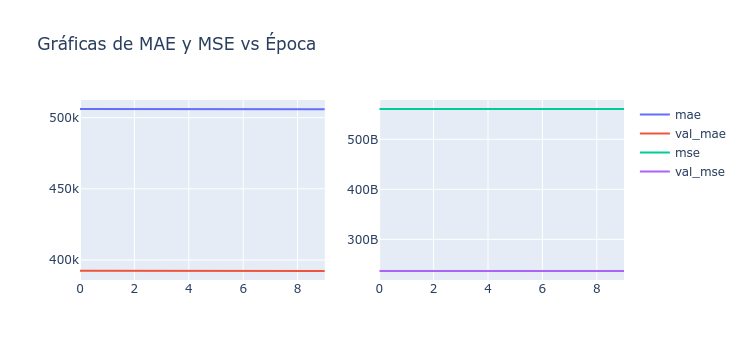

6/6 [==============================] - 0s 5ms/step


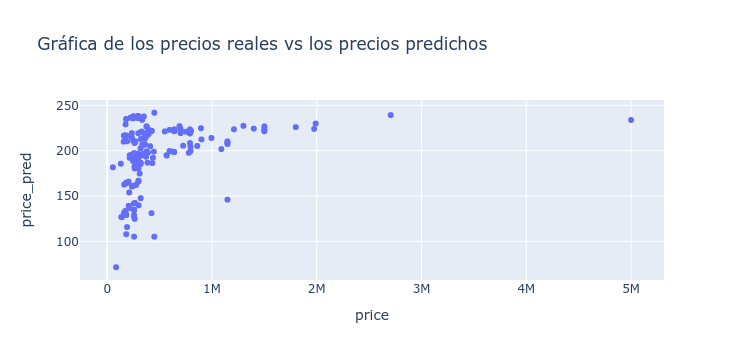

In [129]:
evol_train = pd.DataFrame(history.history)
evol_train['epoch'] = history.epoch

trace1 = go.Scatter(x=evol_train['epoch'], y=evol_train['mae'], mode='lines',name='mae')
trace2 = go.Scatter(x=evol_train['epoch'], y=evol_train['val_mae'], mode='lines',name='val_mae')

trace3 = go.Scatter(x=evol_train['epoch'], y=evol_train['mse'], mode='lines',name='mse')
trace4 = go.Scatter(x=evol_train['epoch'], y=evol_train['val_mse'], mode='lines',name='val_mse')

fig = make_subplots(rows=1,cols=2)
fig.add_trace(trace1,row=1,col=1)
fig.add_trace(trace2,row=1,col=1)

fig.add_trace(trace3,row=1,col=2)
fig.add_trace(trace4,row=1,col=2)

fig.update_layout(title_text="Gráficas de MAE y MSE vs Época")
fig.show()

data3['price_pred'] = model.predict(x)
px.scatter(data3,x='price',y='price_pred',title='Gráfica de los precios reales vs los precios predichos ')

In [130]:
from sklearn.metrics import r2_score
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

MAE_TRAIN,MAE_TEST = error_gen(y_train,y_pred_train[:,0],y_test,y_pred_test[:,0])

final = resultados.shape[0]
resultados.loc[final] = ['ANN','Datos escalados',r2_train,r2_test,MAE_TRAIN,MAE_TEST]
resultados

2/2 [==============================] - 0s 5ms/step


,Modelo,Detalles,R2 train,R2 test,MAE train,MAE test
0,Regresión Lineal,Sin procesar,0.7950,0.7158,116934.624330,1.151660e+05
1,Regresión Lineal,Sin procesar / Sin outliers,0.8118,0.7028,56792.191768,8.810769e+04
2,Regresión Lineal,Datos escalados,0.7862,0.8427,124144.086985,9.185754e+04
3,Regresión Lineal,Datos escalados / Sin outliers,0.7882,0.6828,67404.389758,5.768245e+04
4,Regresión Polinómica,Sin procesar / Grado 3,0.9805,-1258401276.6614,38457.782036,6.741033e+09
5,Regresión Polinómica,Sin procesar / Grado 3 / Sin outliers,0.4521,-10467.3640,102359.688419,6.097405e+06
6,SVM,Sin procesar / linear,0.7351,0.8877,120667.133933,9.248978e+04
7,SVM,Sin procesar / poly,-0.0549,-0.3638,226694.281742,3.340851e+05
8,SVM,Sin procesar / rbf,-0.1149,-0.0634,261855.869581,2.069879e+05
9,SVM,Sin procesar / sigmoid,-0.1677,-0.1947,197764.939590,4.573644e+05


Guardamos la tabla de evaluaciones obtenida:

In [131]:
resultados.to_csv('../data/tabla_resultados_evaluaciones_modelos.csv', index=False)